## Effect of parameters on P(k)
---
In this notebook we vary the parameters given in the CCL cosmology and plot the effects this has on the matter power spectrum. 
We will aim to produce one plot in which all parameters, of the $\Lambda CDM$ model, are varied within the range of known priors(presented in Planck and DES papers). Thus, such a plot will contain about 6 to 7 subplots. We will make this selection of subplots for different values of the reddshift(z). Since we have to specify the scalefactor(a), we find the corresponding a through: $a (t) = \frac{1}{1+z}$ such that we get the following, for the values:
- $z = 0 --> a = 1$
- $z = 0.5 --> a = 0.667$
- $z = 1 --> a = 0.5$
- $z = 1.5 --> a = 0.4$
---
The main idea is to develope an intuition for the effect of the $ \Lambda CDM$ parameters on the matter power spectrum. [Ref: CCLX examples - Matter power spectrum](https://github.com/LSSTDESC/CCLX/blob/master/Power%20spectrum%20example.ipynb)

NOTE: For the ranges of the parameters given by the priors, we refer to:
- [Planck](planck-paper link)
- [DES](des-paper link)


In [2]:
# First of all, for good order, import all the necessary packacges, as suggested by the CCLX examples and common sense:
import pyccl as ccl
import numpy as np
import math
import matplotlib.pyplot as plt 

## z = 0, a = 1
Now we define the cosmology for the case of a redshoft of zero (z=0); and vary the parameters within this redshoft bin before plotting them all into a signle plot, using subplots.
In essence we can put all the code into one cell, however: we choose to treat each redshift in itself, this is mainly for overview purposes.
NOTE: we assume a flat universe in all cases; $\Omega_{k} = 0$

<>:50: SyntaxWarning: invalid escape sequence '\O'
<>:51: SyntaxWarning: invalid escape sequence '\O'
<>:53: SyntaxWarning: invalid escape sequence '\q'
<>:54: SyntaxWarning: invalid escape sequence '\q'
<>:50: SyntaxWarning: invalid escape sequence '\O'
<>:51: SyntaxWarning: invalid escape sequence '\O'
<>:53: SyntaxWarning: invalid escape sequence '\q'
<>:54: SyntaxWarning: invalid escape sequence '\q'
/tmp/ipykernel_12230/3058972938.py:50: SyntaxWarning: invalid escape sequence '\O'
  axes[0, 0].plot(k, p_k_lin, label="$\Omega_c = {}$".format(om_c_prior[0]))
/tmp/ipykernel_12230/3058972938.py:51: SyntaxWarning: invalid escape sequence '\O'
  axes[0, 0].plot(k, p_k_non_lin, label="$\Omega_c = {}$".format(om_c_prior[0]))
/tmp/ipykernel_12230/3058972938.py:53: SyntaxWarning: invalid escape sequence '\q'
  axes[0, 0].set_ylabel("$P(k)\quad[Mpc]^3$")
/tmp/ipykernel_12230/3058972938.py:54: SyntaxWarning: invalid escape sequence '\q'
  axes[0, 0].set_xlabel("$k\quad[Mpc^{-1}]$")


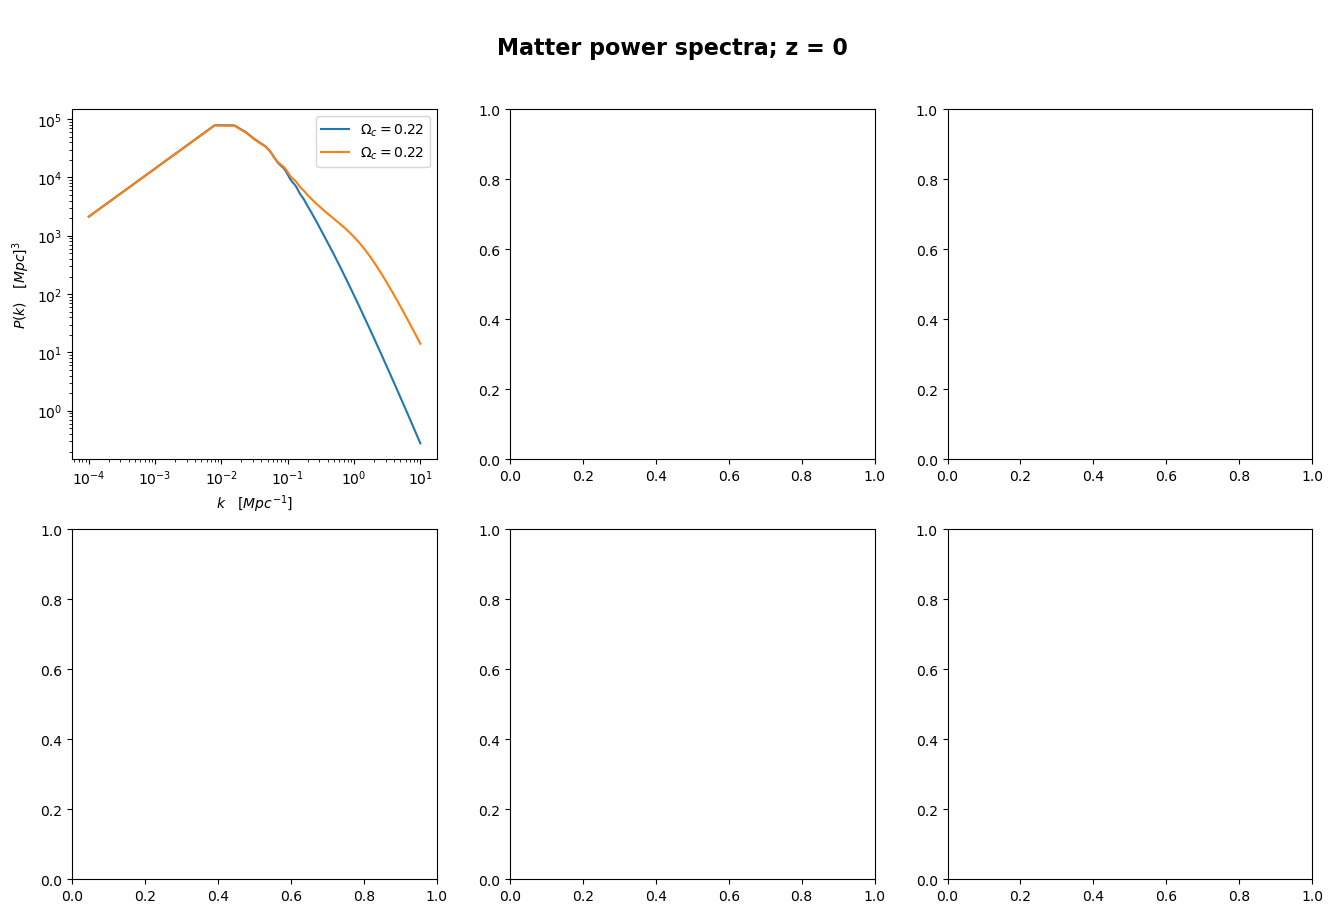

In [38]:
# Considering the found priors, we define the cosmology:
om_c_prior = [0.22, 0.27, 0.32] # these are random; just a trial. The deviations might be too large
om_b_prior = [0.025, 0.045, 0.065]
h_prior = [0.62, 0.67, 0.72]
a_s_prior = [(0.5*2.1e-9), 2.1e-9, (2*.1e-9)]
n_s_prior = [0.92, 0.96, 1]
n_eff_prior = [0.044, 3.044, 6.044]

cosmology = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96) # , transfer_function='boltzmann_class') # , transfer_function="eisenstein_hu")

# To plot the spectrum against the wavenumber:
kmin, kmax, nk = 1e-4, 1e1, 1280
k = np.linspace(kmin, kmax, nk)
a = 1 # scale factor

""" # Since we will plot the same power spectrum for some variations, set up a loop function that returns the matter power spectrum in all variations
def loop_comso(list, parameter, a, k): # "List" is an expected list of possible parameter values, "parameter": the parameter we want to vary, expected entry the index within cosmo arguements
    power_spectra_lin = np.zeros(len(list)) # This is the output list we will plot from, in this array we gather all different 
    #power_spectra_nonlin  = np.zeros(len(list))
    Omega_c = 0.27
    Omega_b = 0.045
    h = 0.67
    A_s = 2.1e-9
    n_s = 0.96
    pars = [Omega_c, Omega_b, h, A_s, n_s]
    for i in range(len(list)):
        pars[parameter] = list[i]
        print (pars)
        cosmo_i = ccl.Cosmology(pars[0],pars[1], pars[2], pars[3], pars[4])
        print(cosmo_i)
        p_k_lin_i = ccl.linear_matter_power(cosmo_i, k, a)
        power_spectra_lin[i] = p_k_lin_i
        print(power_spectra_lin)

    
    return (power_spectra_lin)

print(loop_comso((om_b_prior), parameter=1, a=1, k=k)) """


# Now let us define the matter power spectrum. There is both a linear and nonlinear power spectrum which we define with:
p_k_lin = ccl.linear_matter_power(cosmology, k, a)
p_k_non_lin = ccl.nonlin_matter_power(cosmology, k, a)

# Initiate the plot:
fig, axes = plt.subplots(figsize=(16, 10), nrows=2, ncols=3)
fig.suptitle("\nMatter power spectra; z = 0", weight="bold", fontsize=16)
#plt.subplots_adjust(hspace=0.75) # Make the x-axis readable for the long names of certain places of residence

axes[0, 0].plot(k, p_k_lin, label="$\Omega_c = {}$".format(om_c_prior[0]))
axes[0, 0].plot(k, p_k_non_lin, label="$\Omega_c = {}$".format(om_c_prior[0]))
axes[0, 0].legend()
axes[0, 0].set_ylabel("$P(k)\quad[Mpc]^3$")
axes[0, 0].set_xlabel("$k\quad[Mpc^{-1}]$")
axes[0, 0].set_yscale('log')
axes[0, 0].set_xscale('log')

